In [69]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [70]:
titanic = pd.read_csv(r"C:\Users\HP\Desktop\datasets\titanic.csv")

In [71]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
titanic.shape

(891, 12)

In [73]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [74]:
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace = True)

In [75]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [76]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [77]:
#mapping the genders. LabelEncoder can also be used.
titanic['Sex'] = titanic['Sex'].map({'male':0, 'female':1})

In [78]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [79]:
titanic['Embarked'] = titanic['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [81]:
titanic['Embarked'].value_counts()

0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64

In [82]:
titanic['Embarked'].fillna(0.0, inplace = True)

In [83]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [84]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [85]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Age and Fare have a large variation.

In [87]:
#survival rate based on Pclass
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [90]:
#survival rate based on Sex
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.188908
1,1,0.742038


In [91]:
titanic[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [92]:
titanic[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [93]:
titanic[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,0.0,0.339009
1,1.0,0.553571
2,2.0,0.389610


In [94]:
titanic['AgeBand'] = pd.cut(titanic['Age'], 8)

In [95]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,22.000000,1,0,7.2500,0.0,"(20.315, 30.263]"
1,1,1,1,38.000000,1,0,71.2833,1.0,"(30.263, 40.21]"
2,1,3,1,26.000000,0,0,7.9250,0.0,"(20.315, 30.263]"
3,1,1,1,35.000000,1,0,53.1000,0.0,"(30.263, 40.21]"
4,0,3,0,35.000000,0,0,8.0500,0.0,"(30.263, 40.21]"
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0.0,"(20.315, 30.263]"
887,1,1,1,19.000000,0,0,30.0000,0.0,"(10.368, 20.315]"
888,0,3,1,29.699118,1,2,23.4500,0.0,"(20.315, 30.263]"
889,1,1,0,26.000000,0,0,30.0000,1.0,"(20.315, 30.263]"


In [96]:
titanic[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean()

,AgeBand,Survived
0,"(0.34, 10.368]",0.593750
1,"(10.368, 20.315]",0.382609
2,"(20.315, 30.263]",0.334152
3,"(30.263, 40.21]",0.445161
4,"(40.21, 50.158]",0.383721
5,"(50.158, 60.105]",0.404762
6,"(60.105, 70.052]",0.235294
7,"(70.052, 80.0]",0.200000


In [108]:
titanic.loc[ titanic['Age']<=18, 'Age'] = 0
titanic.loc[ (titanic['Age']>18) & (titanic['Age']<=44), 'Age'] = 1
titanic.loc[ (titanic['Age']>44) & (titanic['Age']<=53), 'Age'] = 2
titanic.loc[ (titanic['Age']>53) & (titanic['Age']<62), 'Age'] = 3
titanic.loc[ titanic['Age']>62, 'Age'] = 4

In [109]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand,FareBand
0,0,3,0,1.0,1,0,7.2500,0.0,"(20.315, 30.263]","(-0.001, 7.854]"
1,1,1,1,1.0,1,0,71.2833,1.0,"(30.263, 40.21]","(39.688, 512.329]"
2,1,3,1,1.0,0,0,7.9250,0.0,"(20.315, 30.263]","(7.854, 10.5]"
3,1,1,1,1.0,1,0,53.1000,0.0,"(30.263, 40.21]","(39.688, 512.329]"
4,0,3,0,1.0,0,0,8.0500,0.0,"(30.263, 40.21]","(7.854, 10.5]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,13.0000,0.0,"(20.315, 30.263]","(10.5, 21.679]"
887,1,1,1,1.0,0,0,30.0000,0.0,"(10.368, 20.315]","(21.679, 39.688]"
888,0,3,1,1.0,1,2,23.4500,0.0,"(20.315, 30.263]","(21.679, 39.688]"
889,1,1,0,1.0,0,0,30.0000,1.0,"(20.315, 30.263]","(21.679, 39.688]"


In [112]:
titanic.drop(['AgeBand'], axis = 1, inplace=True)

In [100]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [104]:
titanic['FareBand'] = pd.qcut(titanic['Fare'], 5) 
#qcut cuts the data within the quartile range

In [105]:
titanic['FareBand']

0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: FareBand, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [107]:
titanic[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [113]:
titanic.loc[ titanic['Fare']<=10, 'Fare'] = 0
titanic.loc[ (titanic['Fare']>10) & (titanic['Fare']<=40), 'Fare'] = 1
titanic.loc[ titanic['Fare']>40, 'Fare'] = 2

In [114]:
titanic.drop(['FareBand'], axis = 1, inplace=True)

In [115]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,0.0,0.0
1,1,1,1,1.0,1,0,2.0,1.0
2,1,3,1,1.0,0,0,0.0,0.0
3,1,1,1,1.0,1,0,2.0,0.0
4,0,3,0,1.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,1.0,0.0
887,1,1,1,1.0,0,0,1.0,0.0
888,0,3,1,1.0,1,2,1.0,0.0
889,1,1,0,1.0,0,0,1.0,1.0


In [116]:
cor = titanic.corr()

In [117]:
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,0.002050,-0.035322,0.081629,0.336594,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.134196,0.083081,0.018443,-0.719687,0.045702
Sex,0.543351,-0.131900,1.000000,-0.031573,0.114631,0.245489,0.272382,0.116569
Age,0.002050,-0.134196,-0.031573,1.000000,-0.066651,-0.060156,0.054771,-0.036328
SibSp,-0.035322,0.083081,0.114631,-0.066651,1.000000,0.414838,0.330031,-0.059961
Parch,0.081629,0.018443,0.245489,-0.060156,0.414838,1.000000,0.310338,-0.078665
Fare,0.336594,-0.719687,0.272382,0.054771,0.330031,0.310338,1.000000,-0.036406
Embarked,0.106811,0.045702,0.116569,-0.036328,-0.059961,-0.078665,-0.036406,1.000000


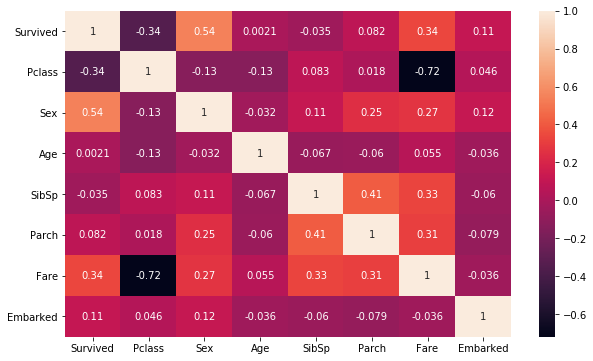

In [125]:
import seaborn as sns
fig, corr = plt.subplots(figsize=(10, 6))
sns.heatmap(titanic.corr(), annot=True)
plt.show()

In [127]:
X = titanic.iloc[:, 1:]

In [128]:
Y = titanic.iloc[:, 0]

In [146]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.1, random_state=0)

In [147]:
log = LogisticRegression()

In [148]:
log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
y_pred = log.predict(x_test)

In [150]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0], dtype=int64)

In [151]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
627    1
380    1
483    1
516    1
505    0
Name: Survived, Length: 90, dtype: int64

In [152]:
accuracy_score(y_pred, y_test)

0.8333333333333334

In [153]:
log.score(x_train, y_train)

0.7915106117353309